# Data Preparation
https://www.kaggle.com/ammar111/house-price-prediction-an-end-to-end-ml-project

In this study, we will use a housing dataset presented by De Cock (2011). This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price. We obtained a csv copy of the data from https://www.kaggle.com/prevek18/ames-housing-dataset.

# Data Description

# Reading the Dataset

The first step is reading the dataset from the csv file we downloaded. We will use the read_csv() function from Pandas Python package:

In [1]:
import pandas as pd
import numpy as np
## Import data from csv. 
dataset = pd.read_csv("data/AmesHousing.csv")

# Getting A Feel of the Dataset

Let's display the first few rows of the dataset to get a feel of it:

In [2]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Now, let's get statistical information about the numeric columns in our dataset. We want to know the mean, the standard deviation, the minimum, the maximum, and the 50th percentile (the median) for each numeric column in the dataset:

In [3]:
dataset.describe(include=[np.number],percentiles=[.5]).transpose().drop("count",axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


From the table above, we can see, for example, that the average lot area of the houses in our dataset is 10,147.92 ft2 with a standard deviation of 7,880.02 ft2. We can see also that the minimum lot area is 1,300 ft2 and the maximum lot area is 215,245 ft2 with a median of 9,436.5 ft2. Similarly, we can get a lot of information about our dataset variables from the table.

Then, we move to see statistical information about the non-numerical columns in our dataset:

In [4]:
dataset.describe(include=[np.object]).transpose().drop('count',axis=1)

,unique,top,freq
MS Zoning,7,RL,2273
Street,2,Pave,2918
Alley,2,Grvl,120
Lot Shape,4,Reg,1859
Land Contour,4,Lvl,2633
Utilities,3,AllPub,2927
Lot Config,5,Inside,2140
Land Slope,3,Gtl,2789
Neighborhood,28,NAmes,443
Condition 1,9,Norm,2522


In the table we got, count represents the number of non-null values in each column, unique represents the number of unique values, top represents the most frequent element, and freq represents the frequency of the most frequent element.

# Data Cleaning

### Dealing with Missing Values

We should deal with the problem of missing values because some machine learning models don't accept data with missing values. Firstly, let's see the number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [5]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [6]:
missing_percentage(dataset)

,Total,Percent
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Qual,159,5.43
Garage Yr Blt,159,5.43
Garage Cond,159,5.43
Garage Finish,159,5.43


Now we start dealing with these missing values.

#### Pool QC

The percentage of missing values in Pool QC column is 99.56% which is very high. We think that a missing value in this column denotes that the corresponding house doesn't have a pool. To verify this, let's take a look at the values of Pool Area column:

In [7]:
dataset["Pool Area"].value_counts()

0      2917
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: Pool Area, dtype: int64

We can see that there are 2917 entries in Pool Area column that have a value of 0. This verfies our hypothesis that each house without a pool has a missing value in Pool QC column and a value of 0 in Pool Area column. So let's fill the missing values in Pool QC column with "No Pool":

In [8]:
def cat_constant(df,column_name,value='Missing'):
    df[column_name].fillna(value, inplace=True)
    return df

In [9]:
dataset = cat_constant(dataset,'Pool QC',value='No Pool')

#### Misc Feature

The percentage of missing values in Pool QC column is 96.38% which is very high also. Let's take a look at the values of Misc Val column:

In [10]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: Misc Val, dtype: int64

We can see that Misc Val column has 2827 entries with a value of 0. Misc Feature has 2824 missing values. Then, as with Pool QC, we can say that each house without a "miscellaneous feature" has a missing value in Misc Feature column and a value of 0 in Misc Val column. So let's fill the missing values in Misc Feature column with "No Feature":

In [11]:
dataset = cat_constant(dataset,'Misc Feature',value='No Feature')

#### Alley, Fence, and Fireplace Qu

According to the dataset documentation, NA in Alley, Fence, and Fireplace Qu columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace" accordingly:

In [12]:
dataset = cat_constant(dataset,'Alley',value='No Alley')
dataset = cat_constant(dataset,'Fence',value='No Fence')
dataset = cat_constant(dataset,'Fireplace Qu',value='No Fireplace')

#### Lot Frontage

As we saw previously, Lot Frontage represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0:

In [13]:
def int_constant(df,column_name,value=0):
    df[column_name].fillna(value, inplace=True)
    return df

In [14]:
dataset = int_constant(dataset,'Lot Frontage',0)

#### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

According to the dataset documentation, NA in Garage Cond, Garage Qual, Garage Finish, and Garage Type indicates that there is no garage in the house. So we fill in the missing values in these columns with "No Garage". We notice that Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt columns have 159 missing values, but Garage Type has 157 and both Garage Cars and Garage Area have one missing value. Let's take a look at the row that contains the missing value in Garage Cars:

In [15]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


We can see that this is the same row that contains the missing value in Garage Area, and that all garage columns except Garage Type are null in this row, so we will fill the missing values in Garage Cars and Garage Area with 0.

We saw that there are 2 rows where Garage Type is not null while Garage Cond, Garage Qual, Garage Finish, and Garage Yr Blt columns are null. Let's take a look at these two rows:

In [16]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,nan,NaN,1.00,360.00,NaN,NaN
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


We will replace the values of Garage Type with "No Garage" in these two rows also.

For Garage Yr Blt, we will fill in missing values with 0 since this is a numerical column:

In [17]:
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset = cat_constant(dataset,col,value='No Garage')

In [18]:
for col in ['Garage Cars', 'Garage Area', 'Garage Yr Blt']:
    dataset = int_constant(dataset,col,0)

In [19]:
dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

#### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1

According to the dataset documentation, NA in any of the first five of these columns indicates that there is no basement in the house. So we fill in the missing values in these columns with "No Basement". We notice that the first five of these columns have 80 missing values, but BsmtFin Type 2 has 81, Bsmt Exposure has 83, Bsmt Half Bath and Bsmt Full Bath each has 2, and each of the others has 1. Let's take a look at the rows where Bsmt Half Bath is null:

In [20]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,nan,nan


We can see that these are the same rows that contain the missing values in Bsmt Full Bath, and that one of these two rows is contains the missing value in each of Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 columns. We notice also that Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are null in these rows, so we will fill the missing values in Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 columns with 0.


We saw that there are 3 rows where Bsmt Exposure is null while BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are not null. Let's take a look at these three rows:

In [21]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


We will fill in the missing values in Bsmt Exposure for these three rows with "No". According to the dataset documentation, "No" for Bsmt Exposure means "No Exposure":

Let's now take a look at the row where BsmtFin Type 2 is null while BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are not null:

In [22]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


We will fill in the missing value in BsmtFin Type 2 for this row with "Unf". According to the dataset documentation, "Unf" for BsmtFin Type 2 means "Unfinished":

In [23]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset = int_constant(dataset,col,0)

In [24]:
for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset = cat_constant(dataset,col,value='No Basement')    

In [25]:
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"

In [26]:
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

In [27]:
missing_percentage(dataset)

,Total,Percent
Mas Vnr Type,23,0.78
Mas Vnr Area,23,0.78
Electrical,1,0.03


#### Mas Vnr Area and Mas Vnr Type

Each of these two columns have 23 missing values. We will fill in these missing values with "None" for Mas Vnr Type and with 0 for Mas Vnr Area. We use "None" for Mas Vnr Type because in the dataset documentation, "None" for Mas Vnr Type means "None" (i.e. no masonry veneer):

In [28]:
dataset = int_constant(dataset,'Mas Vnr Area',0)
dataset = cat_constant(dataset,'Mas Vnr Type',value='None')

#### Electrical

This column has one missing value. We will fill in this value with the mode of this column:

In [29]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Now let's check if there is any remaining missing value in our dataset:

In [30]:
missing_percentage(dataset)

,Total,Percent


This means that our dataset is now complete; it doesn't contain any missing value anymore.

# Outlier Removal

In [31]:
## Getting the correlation of all the features with target variable. 
(dataset.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

Overall Qual                      0.64
Gr Liv Area                       0.50
Garage Cars                       0.42
Garage Area                       0.41
Total Bsmt SF                     0.40
1st Flr SF                        0.39
Year Built                        0.31
Full Bath                         0.30
Year Remod/Add                    0.28
Mas Vnr Area                      0.25
TotRms AbvGrd                     0.25
Fireplaces                        0.23
BsmtFin SF 1                      0.19
Wood Deck SF                      0.11
Open Porch SF                     0.10
Half Bath                         0.08
Bsmt Full Bath                    0.08
2nd Flr SF                        0.07
Lot Area                          0.07
Garage Yr Blt                     0.06
PID                               0.06
Lot Frontage                      0.04
Bsmt Unf SF                       0.03
Bedroom AbvGr                     0.02
Enclosed Porch                    0.02
Kitchen AbvGr            

In [32]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (15,10))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

In [33]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

#### SalePrice vs OverallQual

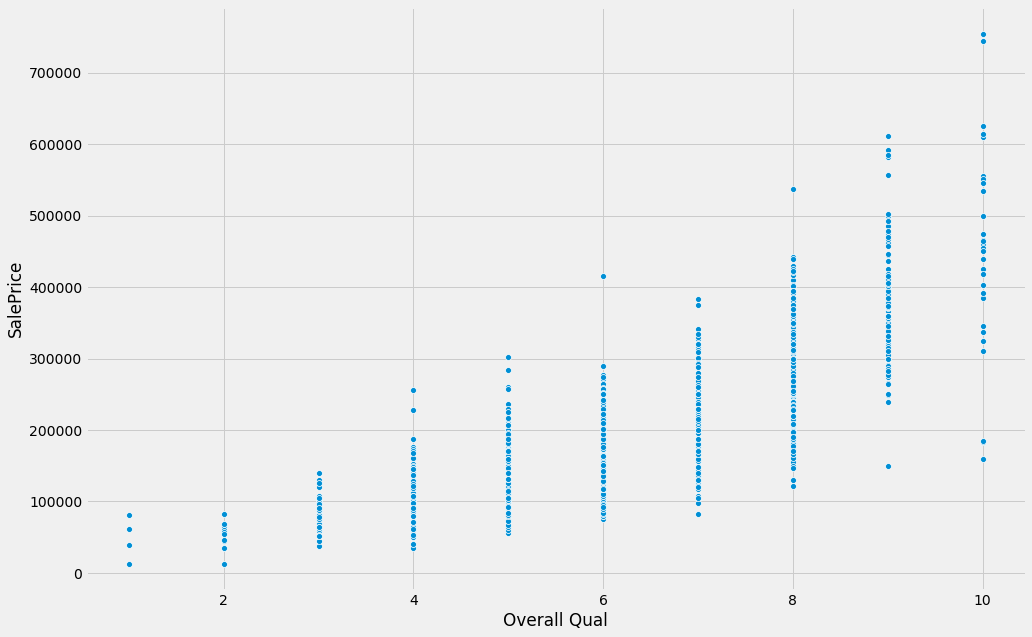

In [34]:
customized_scatterplot(dataset.SalePrice, dataset['Overall Qual'])

Clearly, OverallQual is a categorical variable and scatter plot is not the best way to visualize categorical variables. However, it looks like some of the houses are overpriced compared to their overall quality. These could be outliers. Let's check out some more features to determine the outliers. Let's focus on the numerical variables this time.

#### SalePrice vs GrLivArea

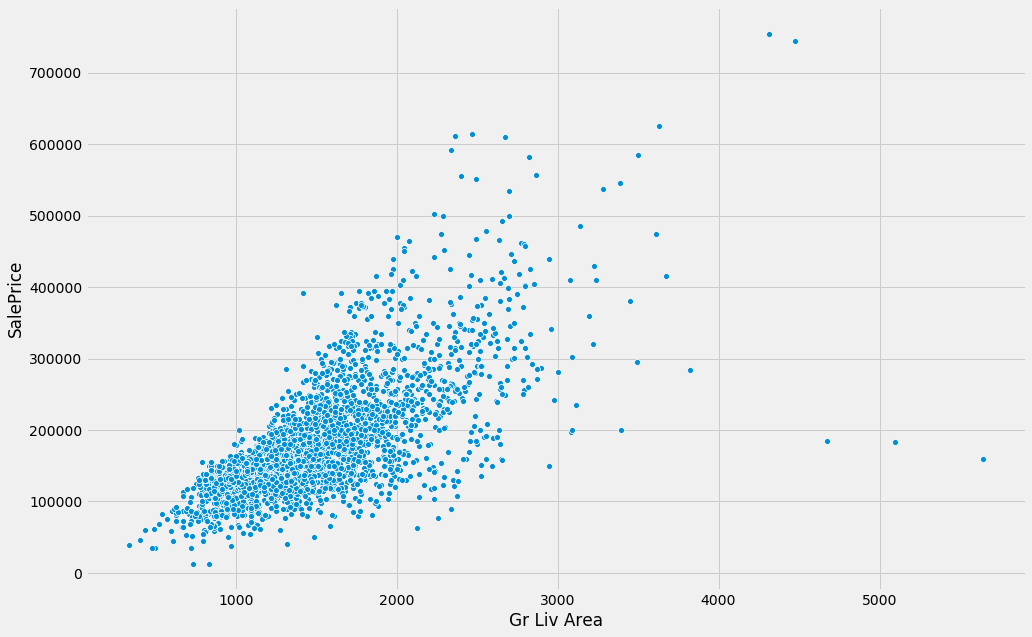

In [35]:
customized_scatterplot(dataset.SalePrice, dataset['Gr Liv Area'])

We can clearly see the five values meant by the authour in the plot above. Now, we will remove them from our dataset. We can do so by keeping data points that have Gr Liv Area less than 4,000. But first we take a look at the dataset rows that correspond to these unusual values:

In [36]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


Now we remove them:

In [37]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

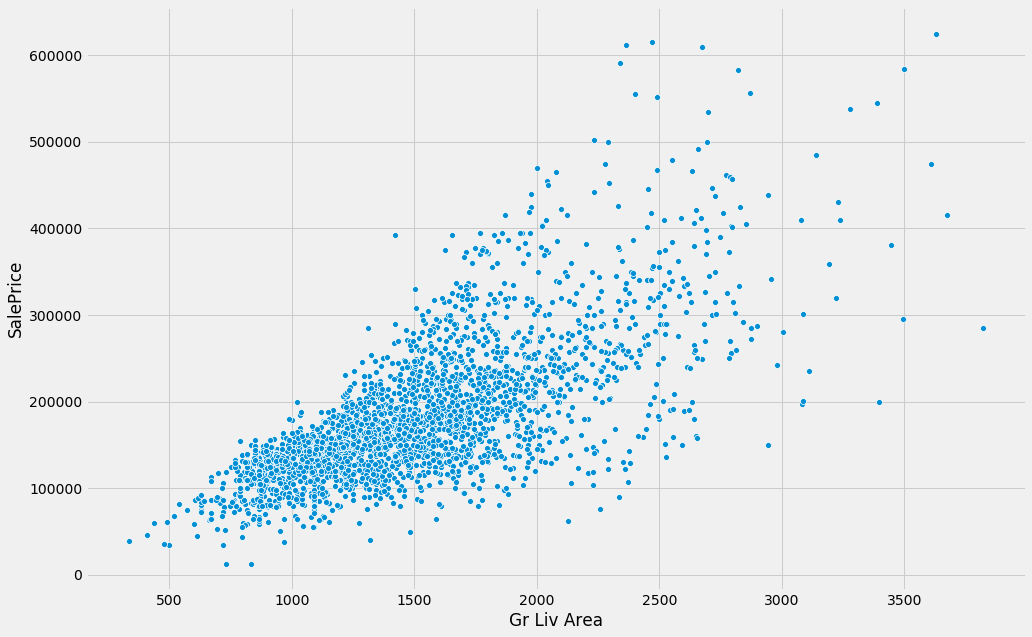

In [38]:
customized_scatterplot(dataset.SalePrice, dataset['Gr Liv Area'])

To avoid problems in modeling later, we will reset our dataset index after removing the outlier rows, so no gaps remain in our dataset index:

In [39]:
dataset.reset_index(drop=True, inplace=True)

# Deleting Some Unimportant Columns

We will delete columns that are not useful in our analysis. The columns to be deleted are Order and PID:

In [40]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

# Exploratory Data Analysis

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

## Target Variable Distribution

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency. This means that if a violin is the widest between 300 and 400, then the area between 300 and 400 contains more data points than other areas:

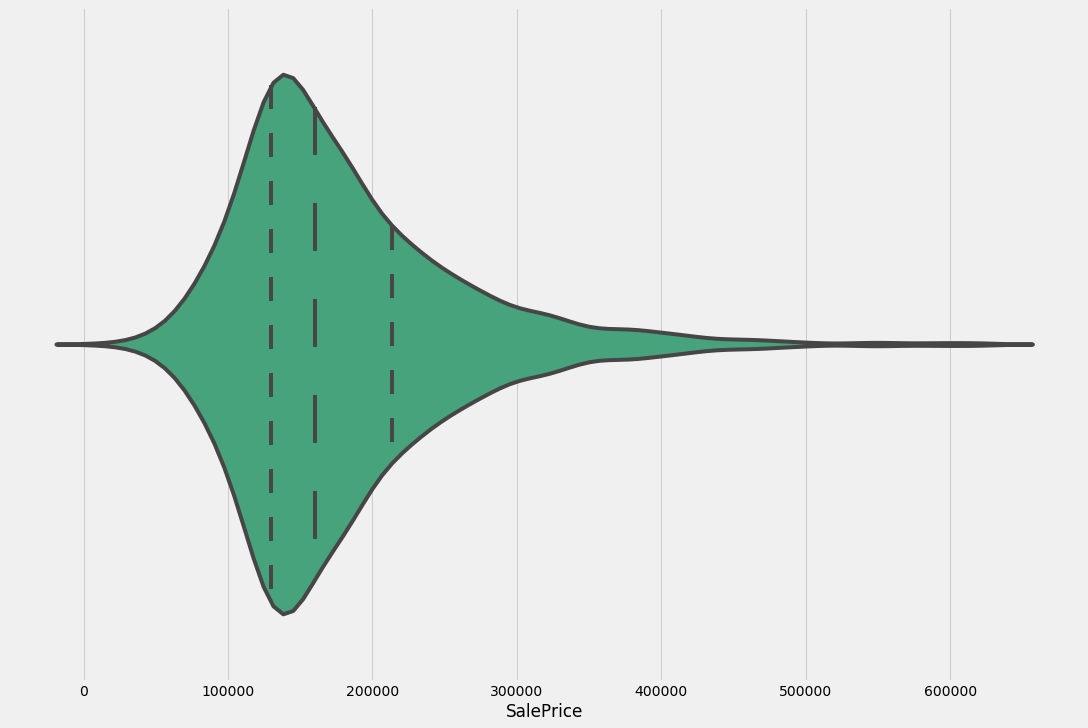

In [41]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E",figure=fig);

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3. Now let's see the box plot of SalePrice:

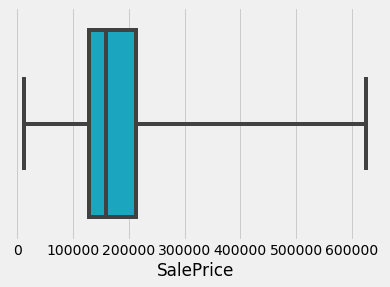

In [42]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

This shows us the minimum and maximum values of SalePrice. It shows us also the three quartiles represented by the box and the vertical line inside of it. Lastly, we plot the histogram of the variable to see a more detailed view of the distribution:

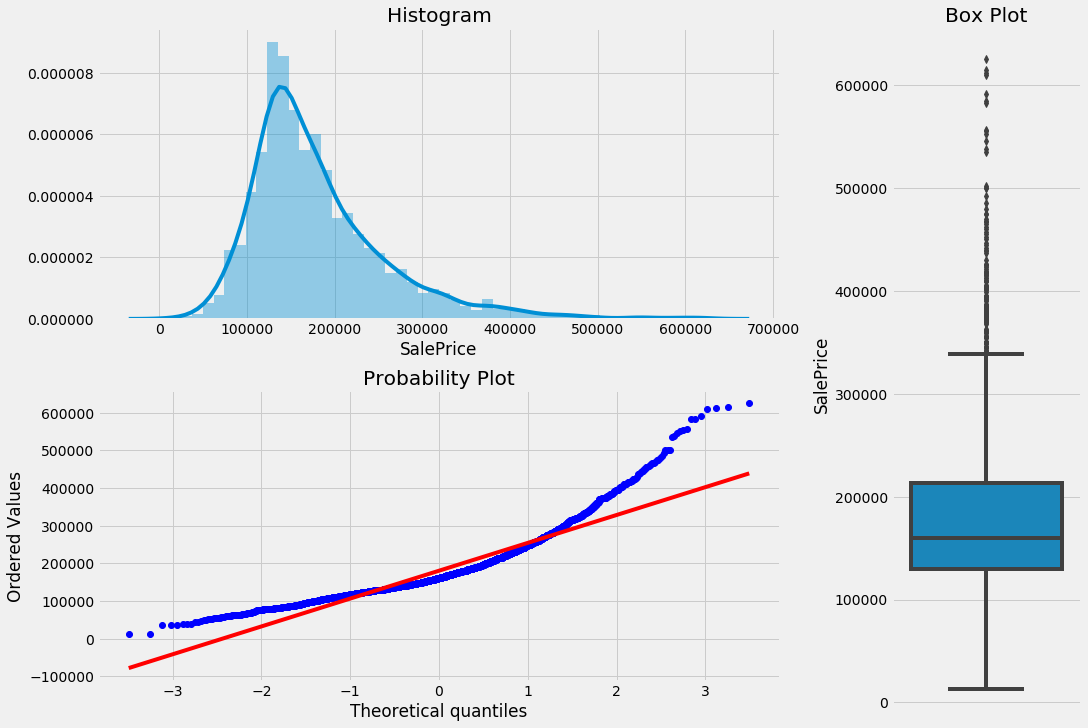

In [43]:
#All together
plotting_3_chart(dataset, 'SalePrice')

# Correlation Between Variables

We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. For example, we would like to see how Lot Area and SalePrice are correlated: Do they increase and decrease together (positive correlation)? Does one of them increase when the other decrease or vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

We will show correlation between our dataset variables (numerical and boolean variables only) using a heatmap graph:

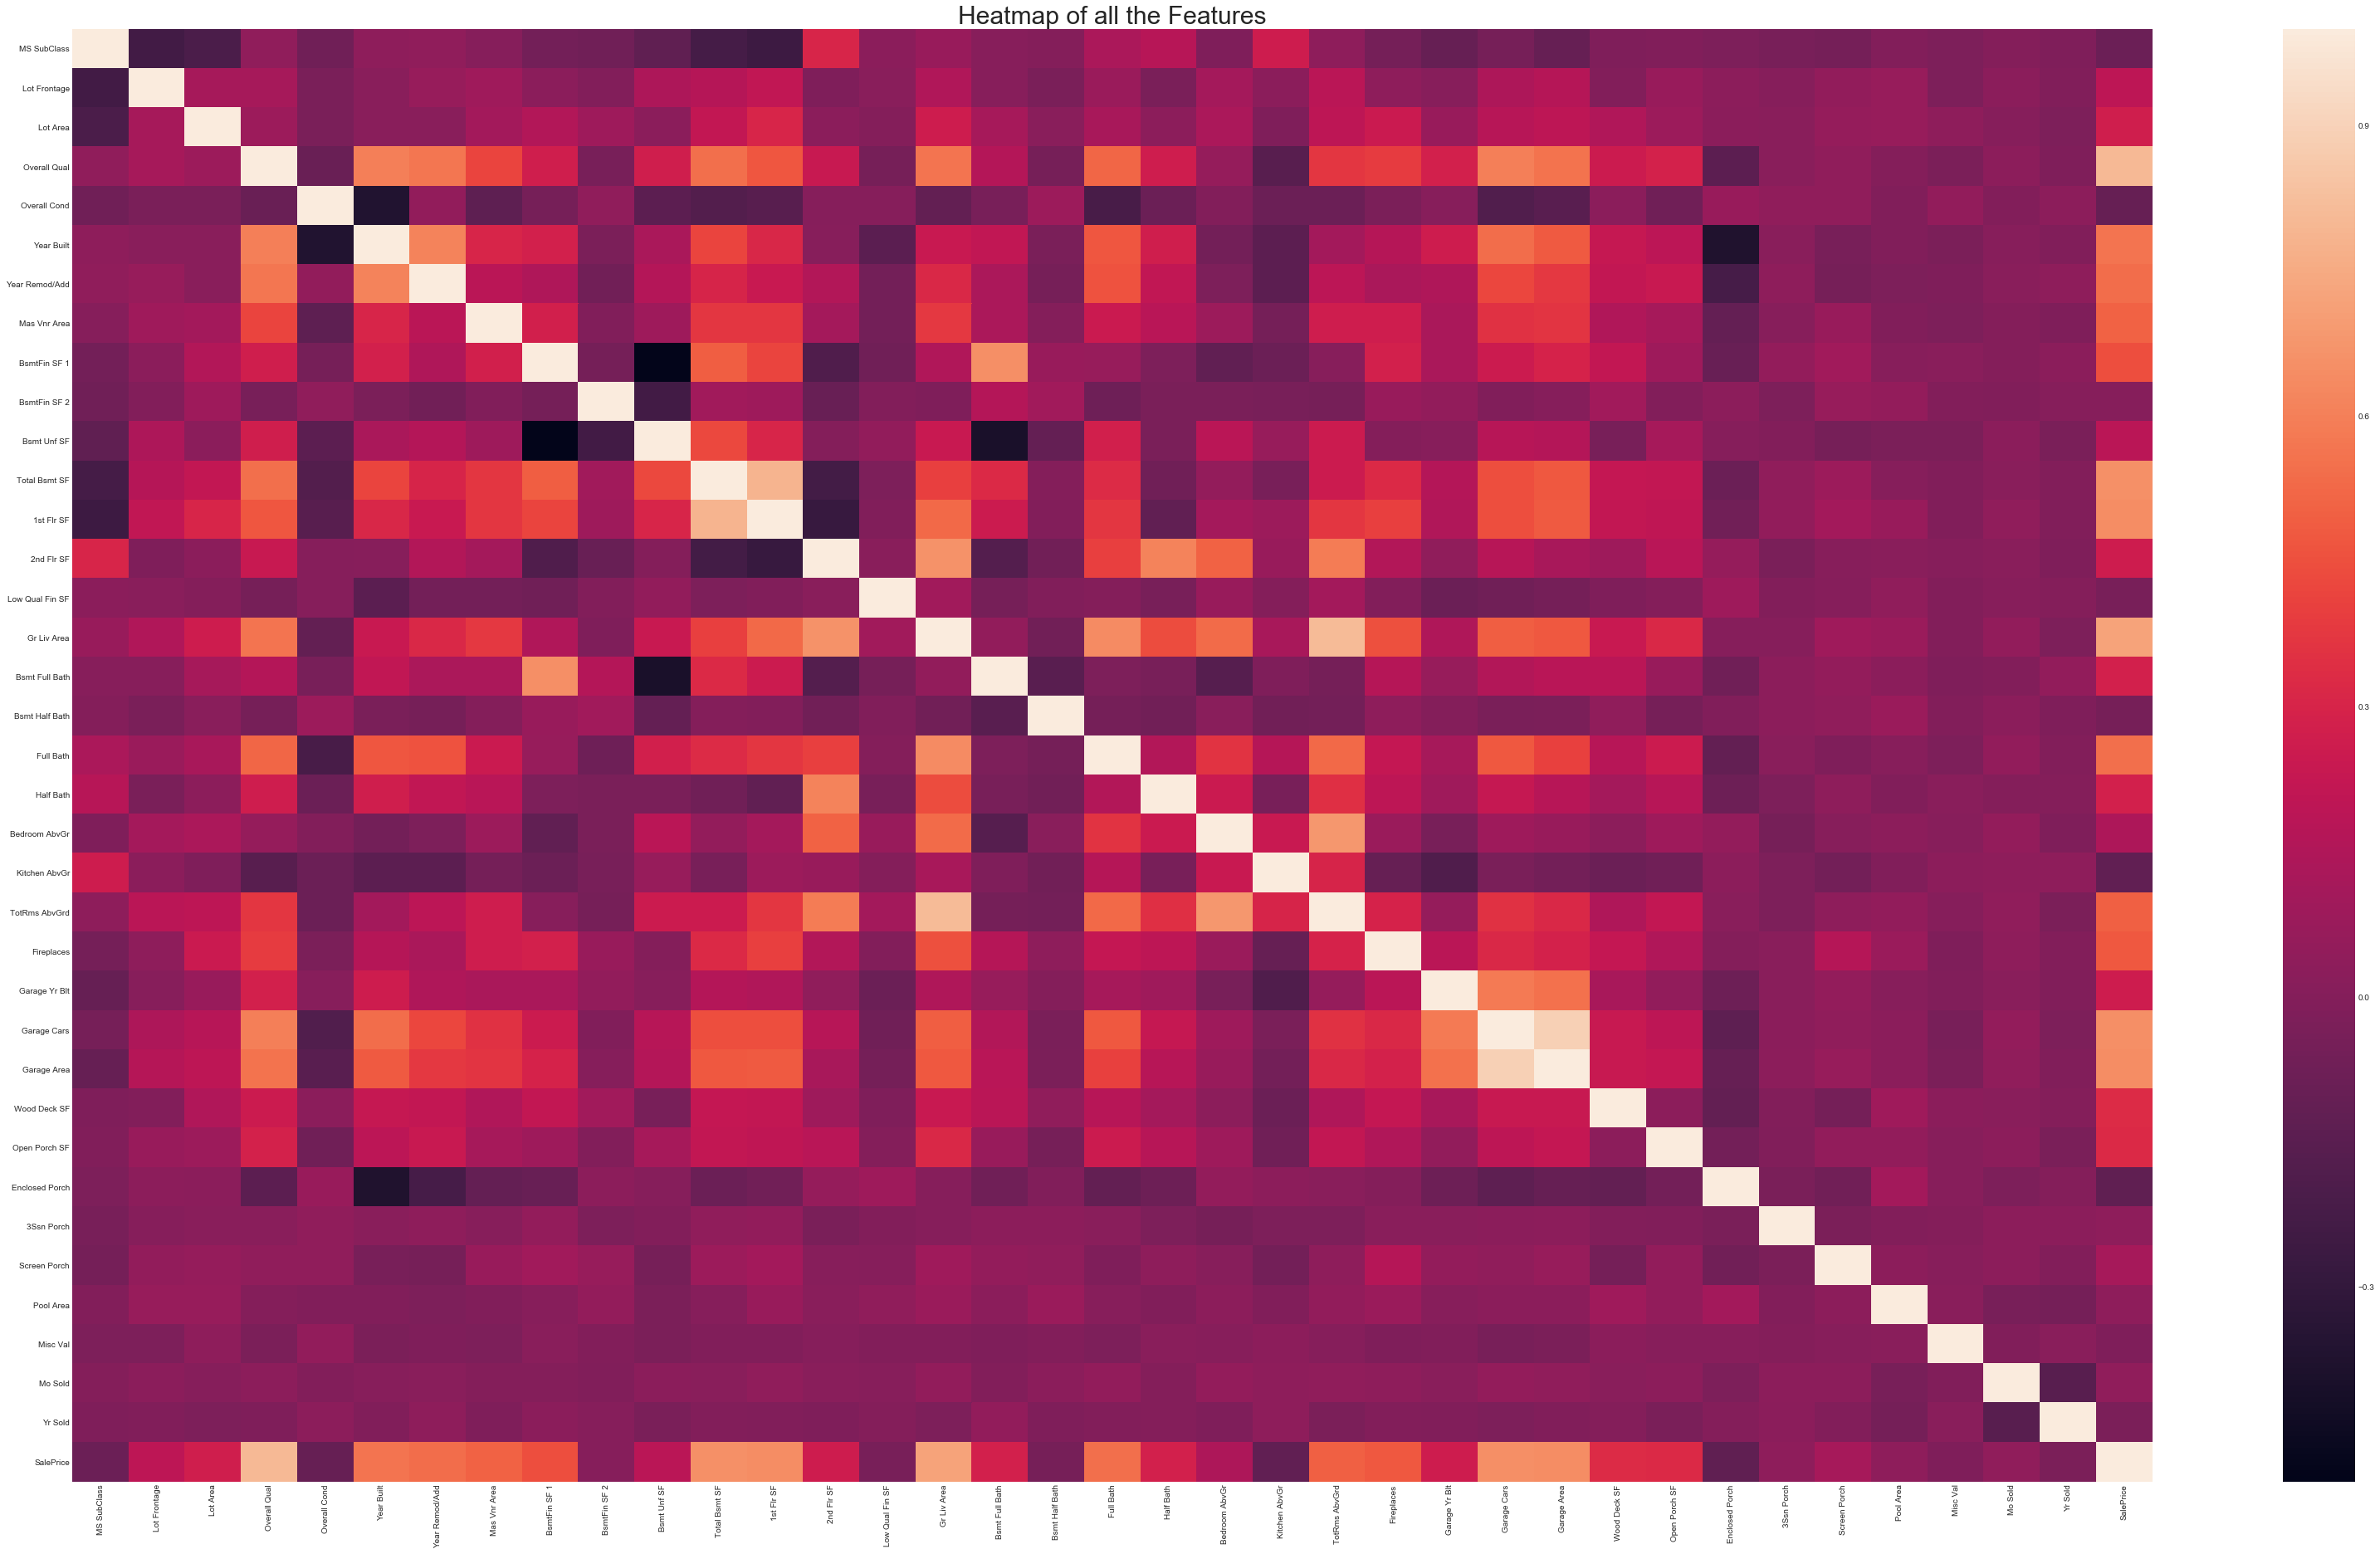

In [51]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.subplots(figsize = (50,30))
#plt.figure(figsize=(50,25))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#fig = plt.gcf()  # or by other means, like plt.subplots
#figsize = fig.get_size_inches()
#fig.set_size_inches(figsize * 1.5)  # scale current size by 1.5


sns.heatmap(dataset.corr());
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

We can see that there are many correlated variables in our dataset. Wwe notice that Garage Cars and Garage Area have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that Gr Liv Area and TotRms AbvGrd are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too.

Regarding negative correlation, we can see that Bsmt Unf SF is negatively correlated with BsmtFin SF 1, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that Bsmt Unf SF is negatively correlated with Bsmt Full Bath which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (SalePrice). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with Overall Qual and Gr Liv Area. We see also that the target variable is positively correlated with Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area.

### Relatioships Between the Target Variable and Other Varibles

#### High Positive Correlation

In [52]:
## Getting the correlation of all the features with target variable. 
(dataset.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

Overall Qual                      0.65
Gr Liv Area                       0.52
Total Bsmt SF                     0.43
Garage Cars                       0.43
Garage Area                       0.42
1st Flr SF                        0.41
Year Built                        0.32
Full Bath                         0.30
Year Remod/Add                    0.29
Mas Vnr Area                      0.26
TotRms AbvGrd                     0.25
Fireplaces                        0.23
BsmtFin SF 1                      0.20
Wood Deck SF                      0.11
Open Porch SF                     0.10
Half Bath                         0.08
Bsmt Full Bath                    0.08
Lot Area                          0.07
2nd Flr SF                        0.07
Garage Yr Blt                     0.07
Lot Frontage                      0.04
Bsmt Unf SF                       0.03
Bedroom AbvGr                     0.02
Enclosed Porch                    0.02
Kitchen AbvGr                     0.01
Screen Porch             

Firstly, we want to visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are Overall Qual and Gr Liv Area. We start with the relatioship between the target variable and Overall Qual, but before that, let's see the distribution of each of them. Let's start with the target variable SalePrice:

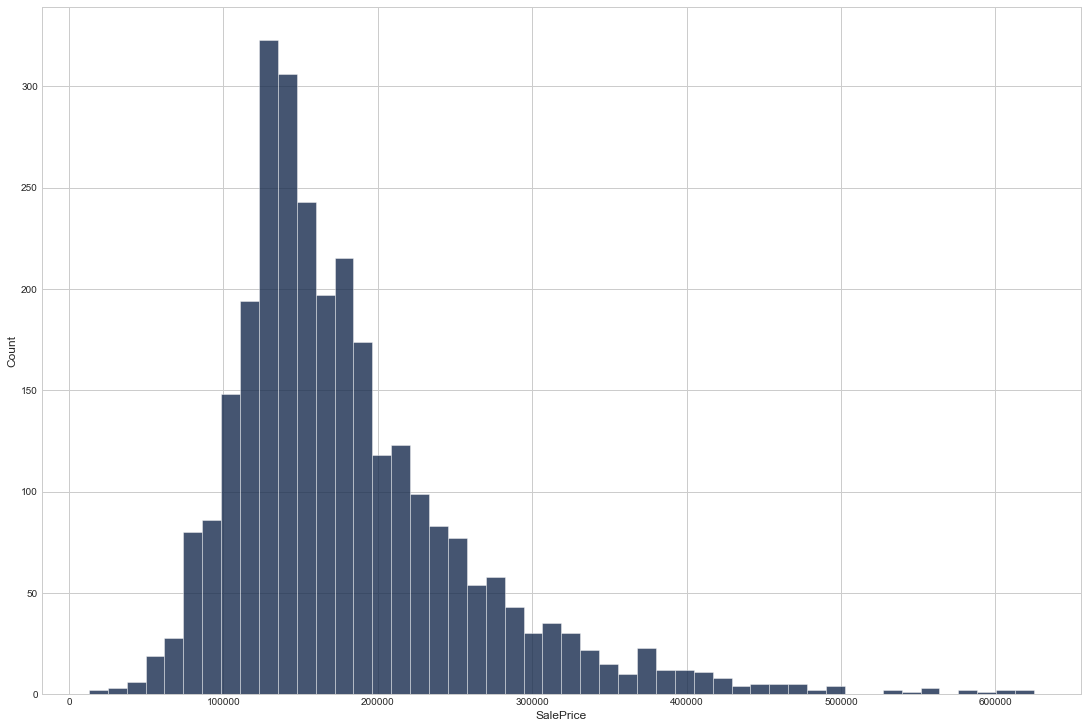

In [53]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, we move to see the distribution of Overall Qual variable:

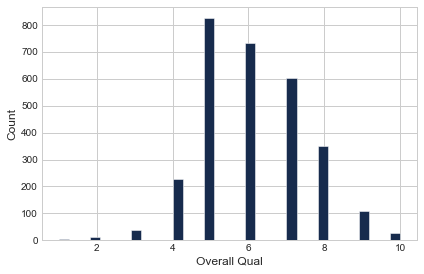

In [54]:
sns.distplot(dataset['Overall Qual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");


We see that Overall Qual takes an integer value between 1 and 10, and that most houses have an overall quality between 5 and 7. Now we plot the scatter plot of SalePrice and Overall Qual to see the relationship between them:

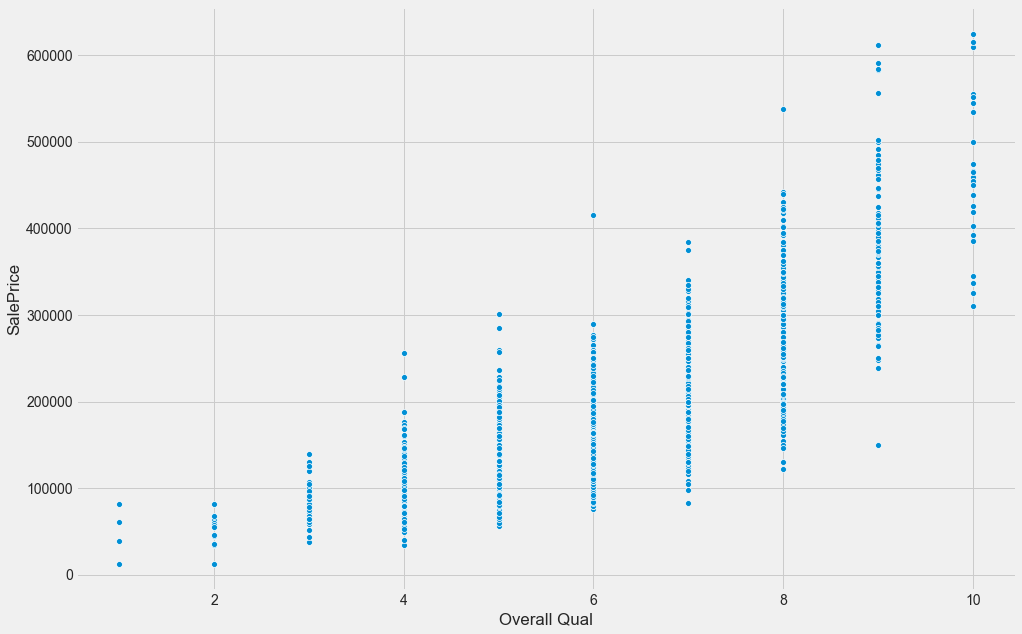

In [55]:
customized_scatterplot(dataset.SalePrice, dataset['Overall Qual'])

We can see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what we got from the heatmap above.

Now, we want to see the relationship between the target variable and Gr Liv Area variable which represents the living area above ground. Let us first see the distribution of Gr Liv Area:

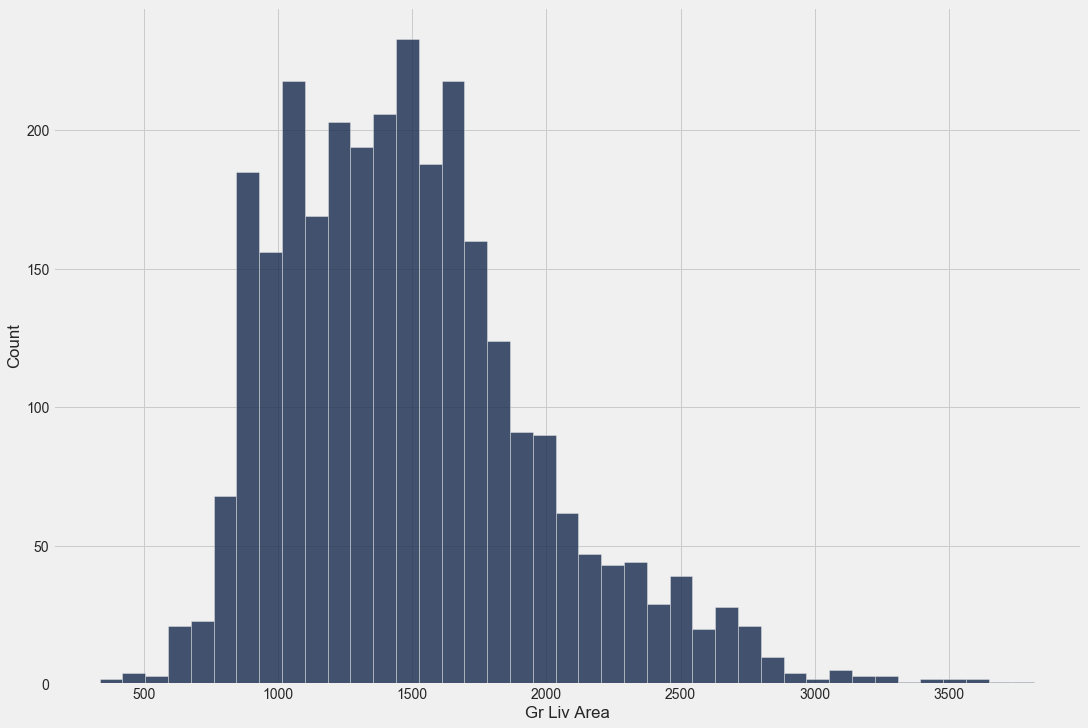

In [56]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['Gr Liv Area'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that the above-ground living area falls approximately between 800 and 1800 ft2. Now, let us see the relationship between Gr Liv Area and the target variable:

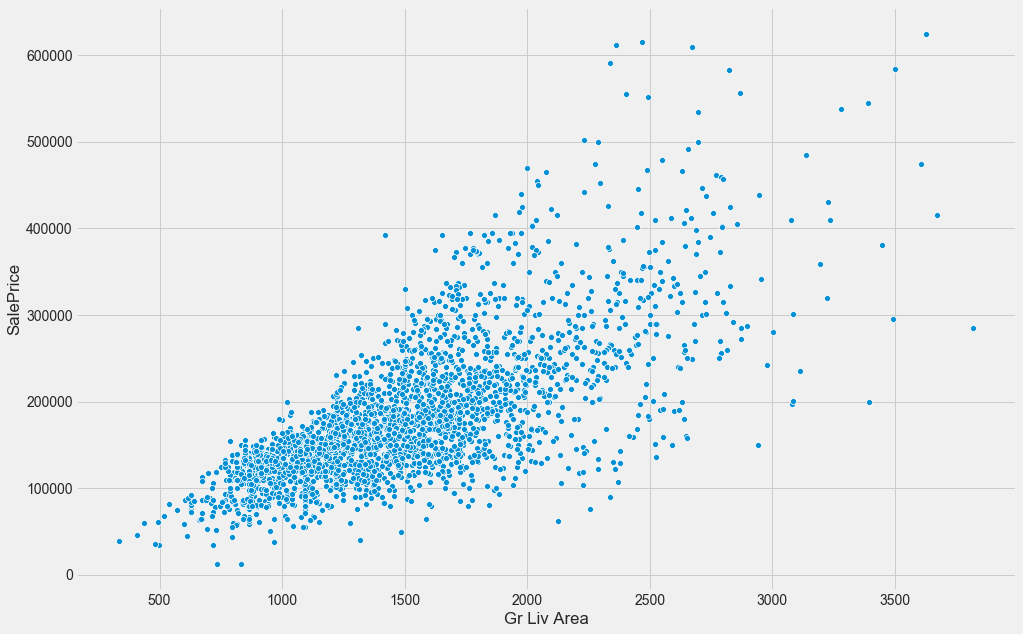

In [57]:
customized_scatterplot(dataset.SalePrice, dataset['Gr Liv Area'])

The scatter plot above shows clearly the strong positive correlation between Gr Liv Area and SalePrice verifying what we found with the heatmap.

#### Moderate Positive Correlation

Next, we want to visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area. We start with the first four. Let us see the distribution of each of them:

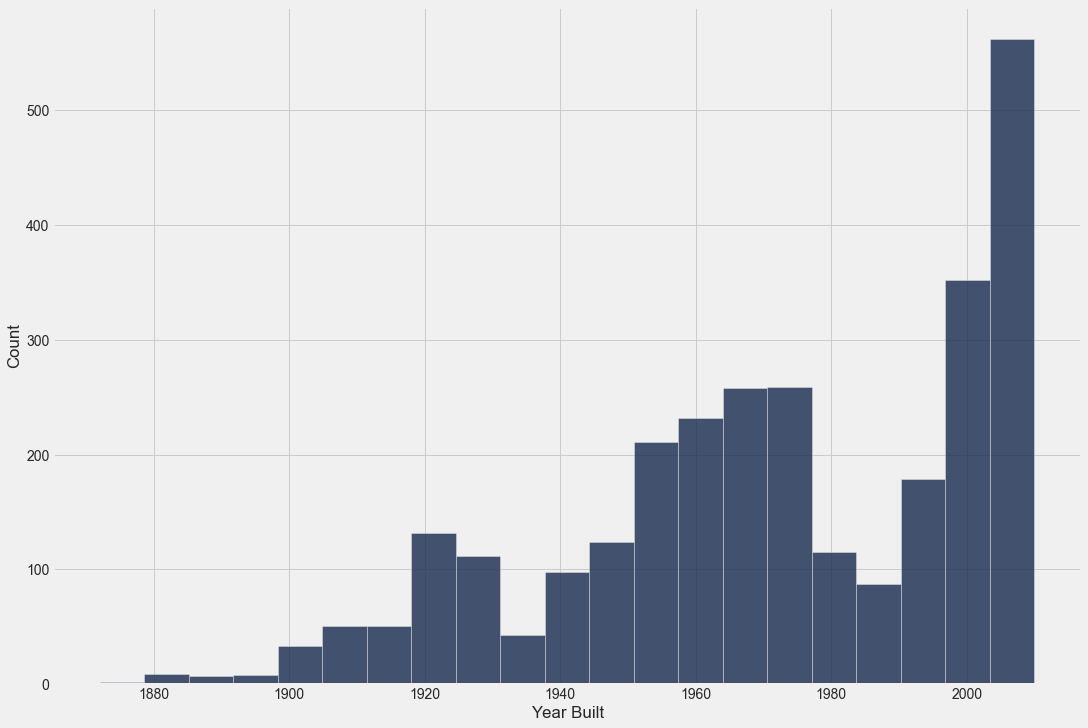

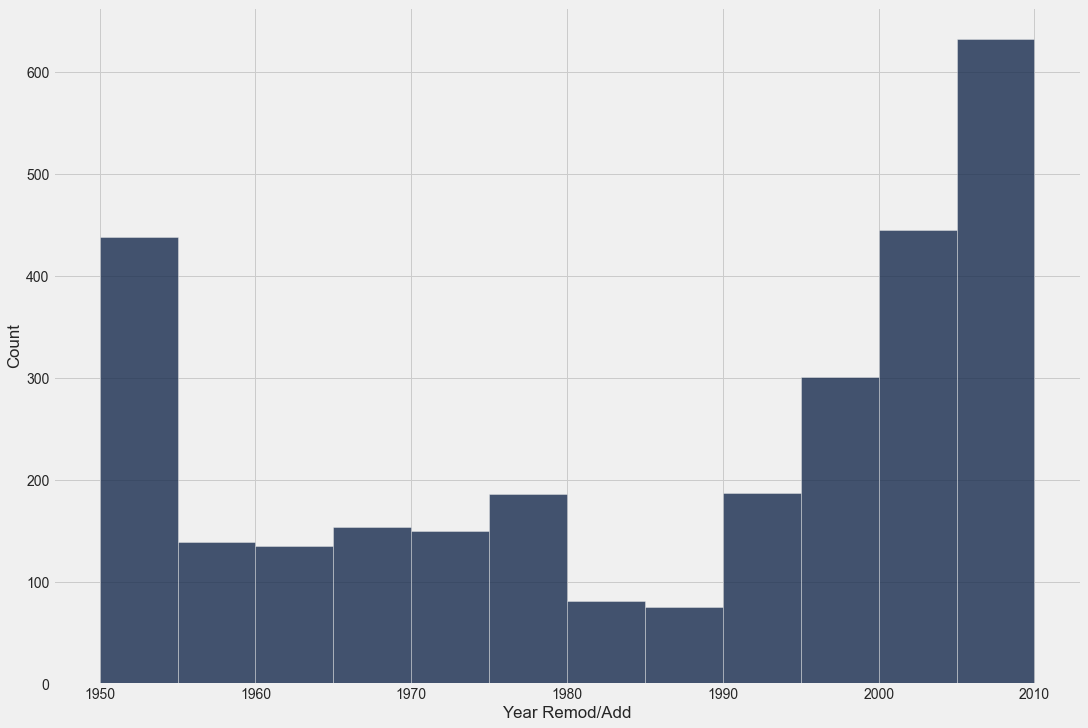

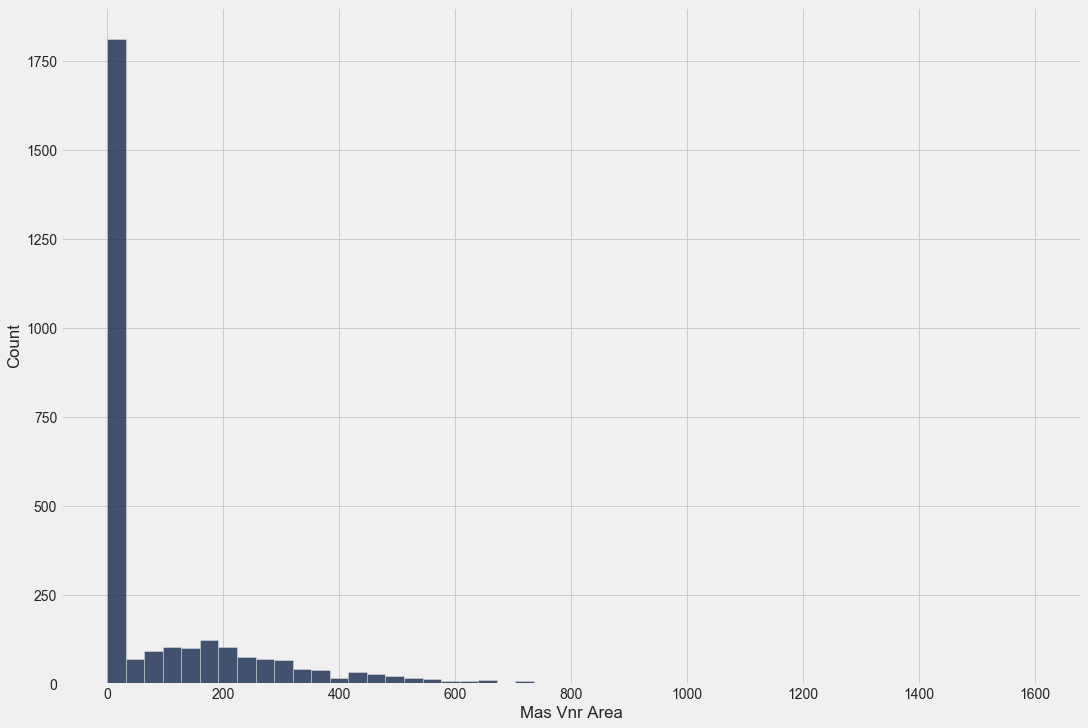

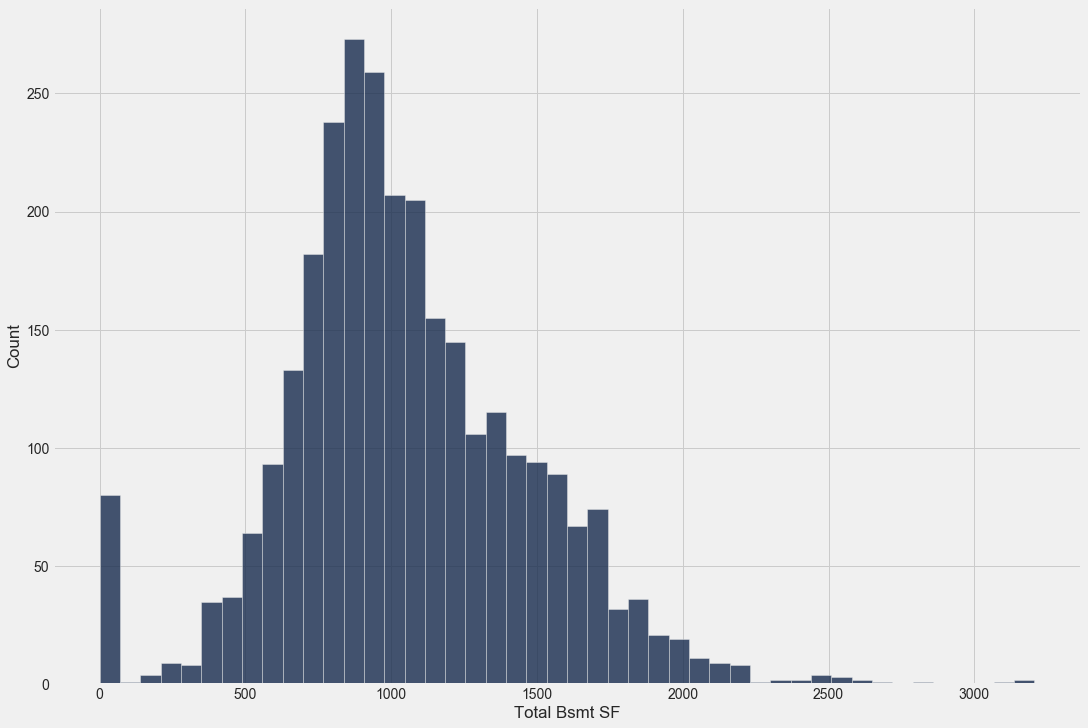

In [58]:
for col in ["Year Built", "Year Remod/Add", 
                             "Mas Vnr Area", "Total Bsmt SF"]:
    plt.figure(constrained_layout=True, figsize=(15,10))
    sns.distplot(dataset[col], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
    plt.ylabel("Count");

Now let us see their relationships with the target variable using scatter plots:

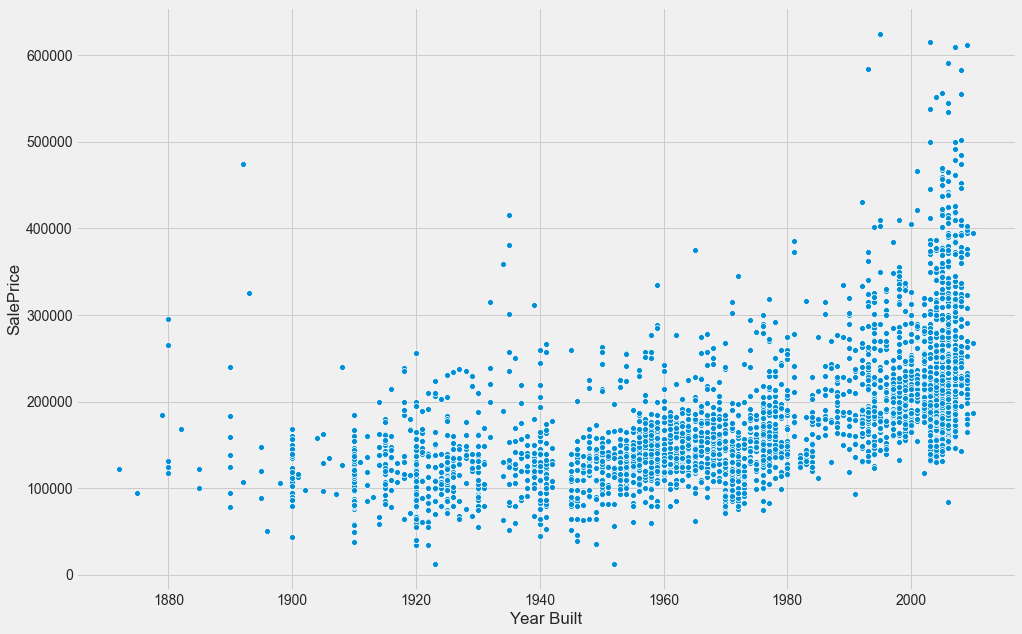

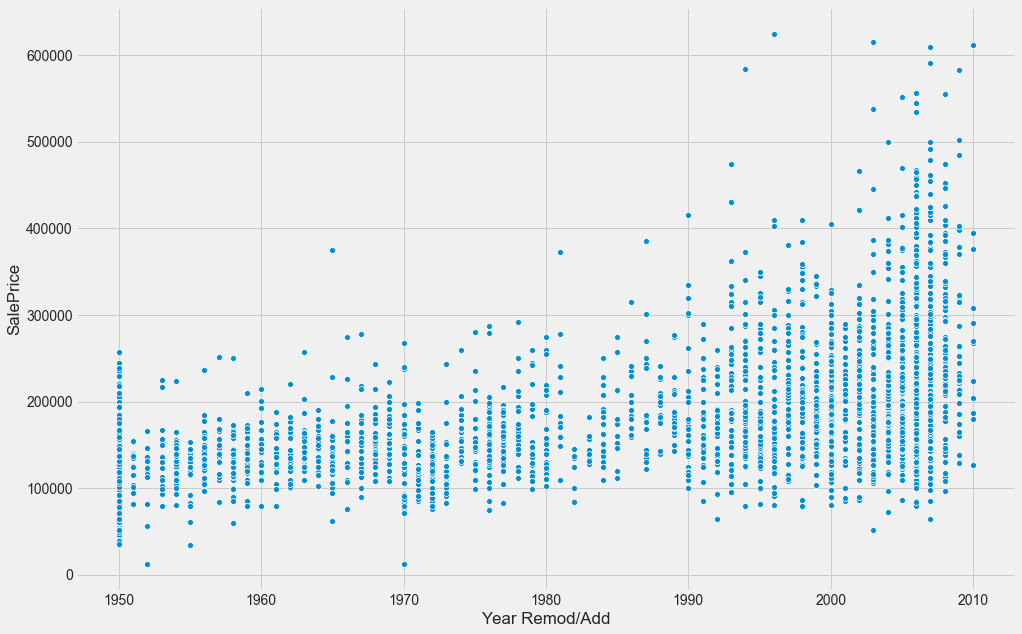

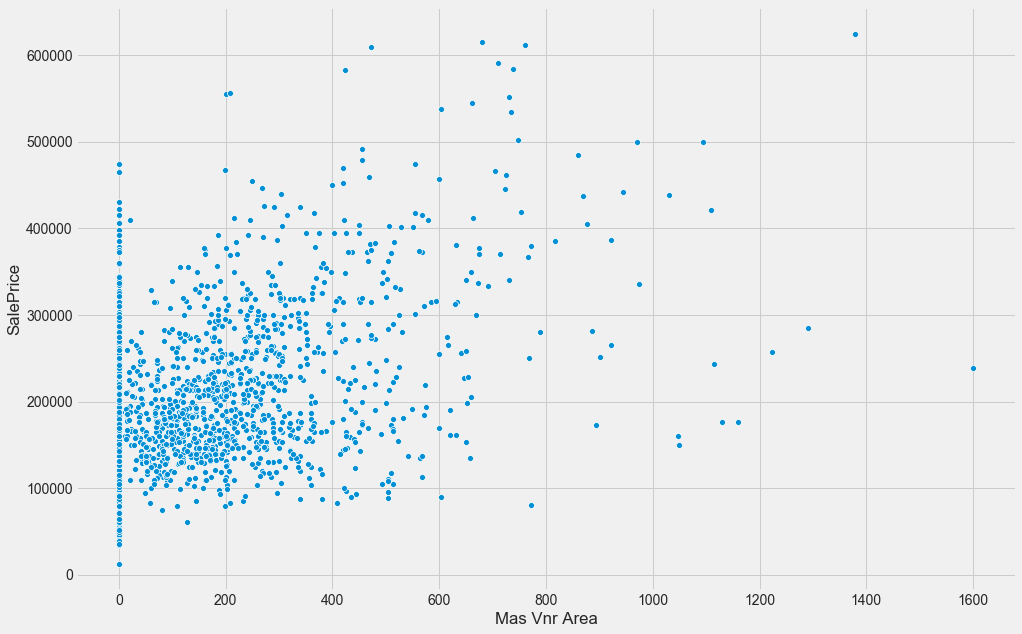

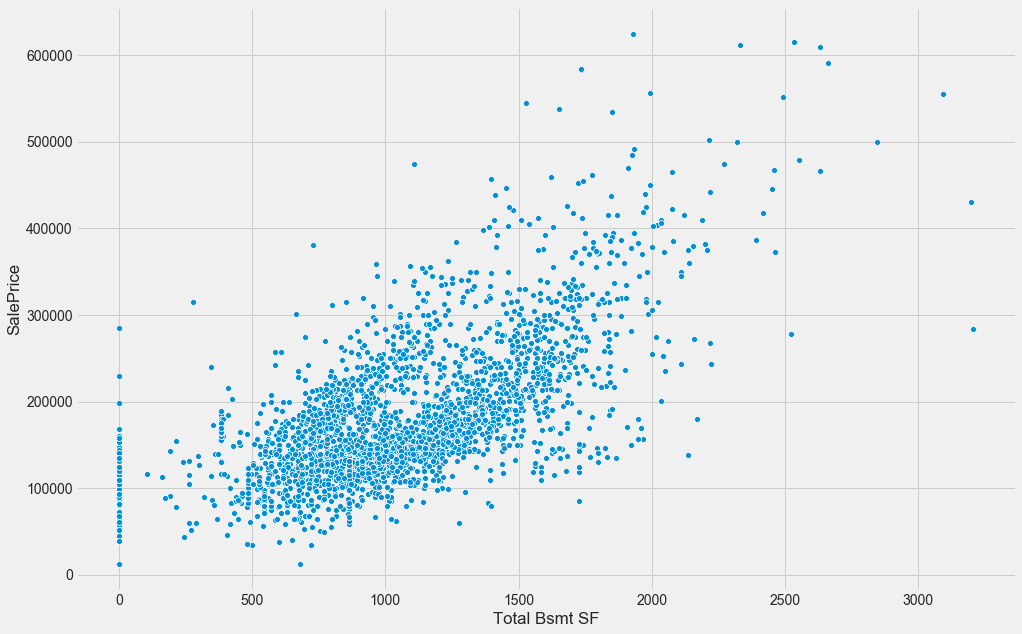

In [59]:
for col in ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]:
    customized_scatterplot(dataset.SalePrice, dataset[col])

Next, we move to the last four. Let us see the distribution of each of them:

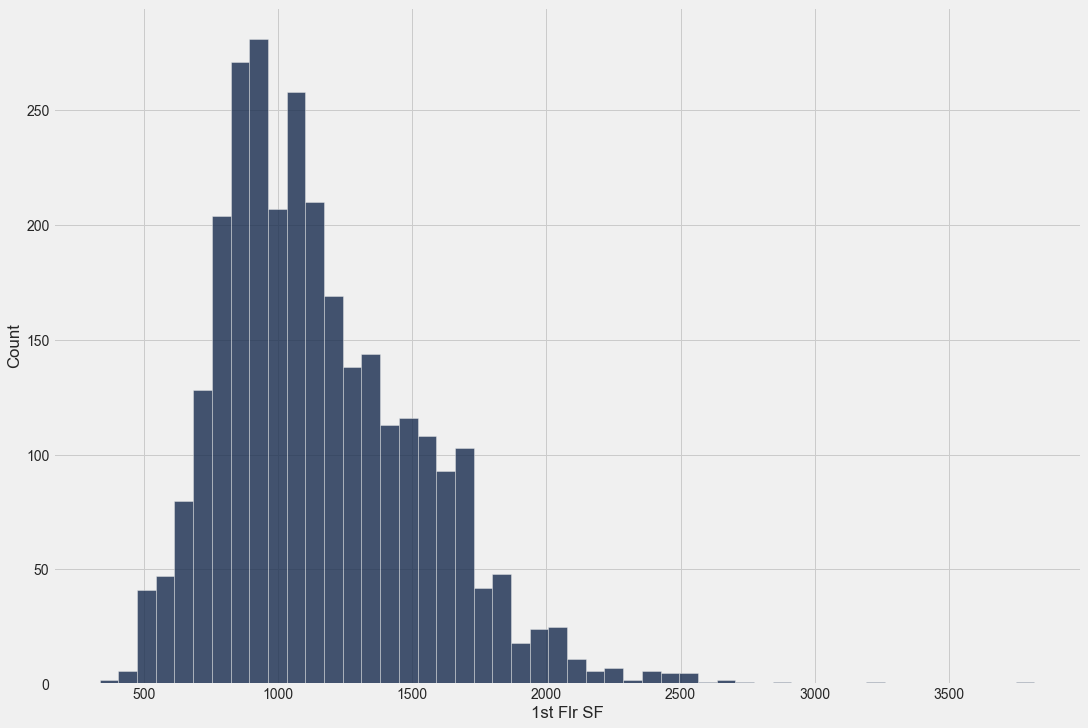

In [60]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['1st Flr SF'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

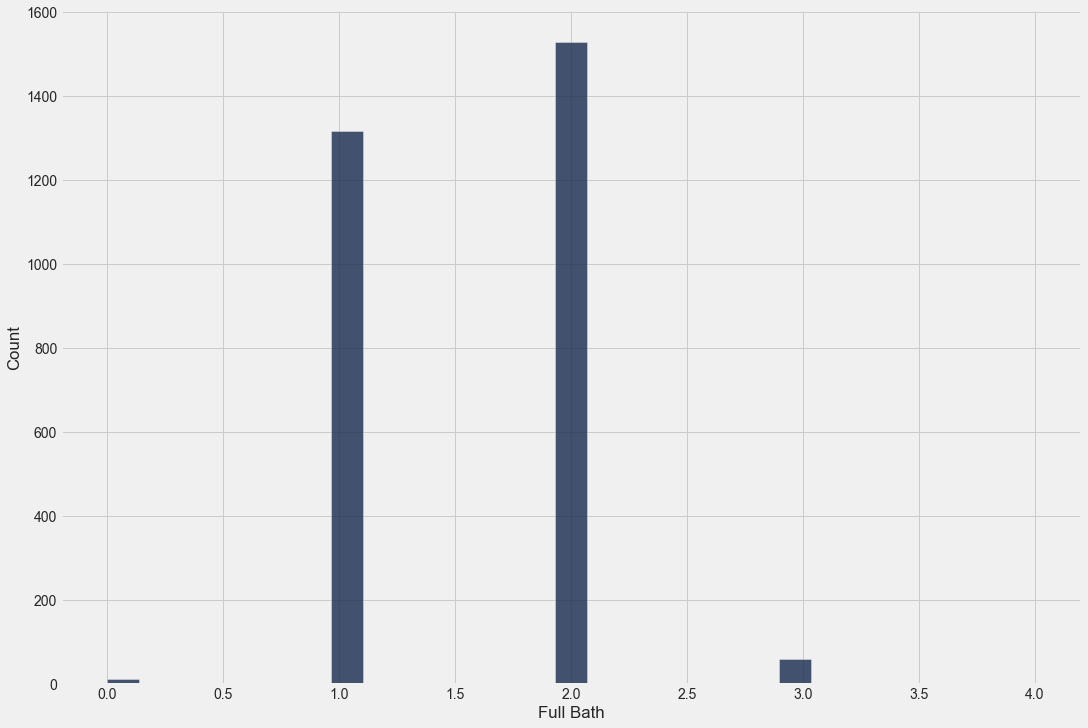

In [61]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['Full Bath'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

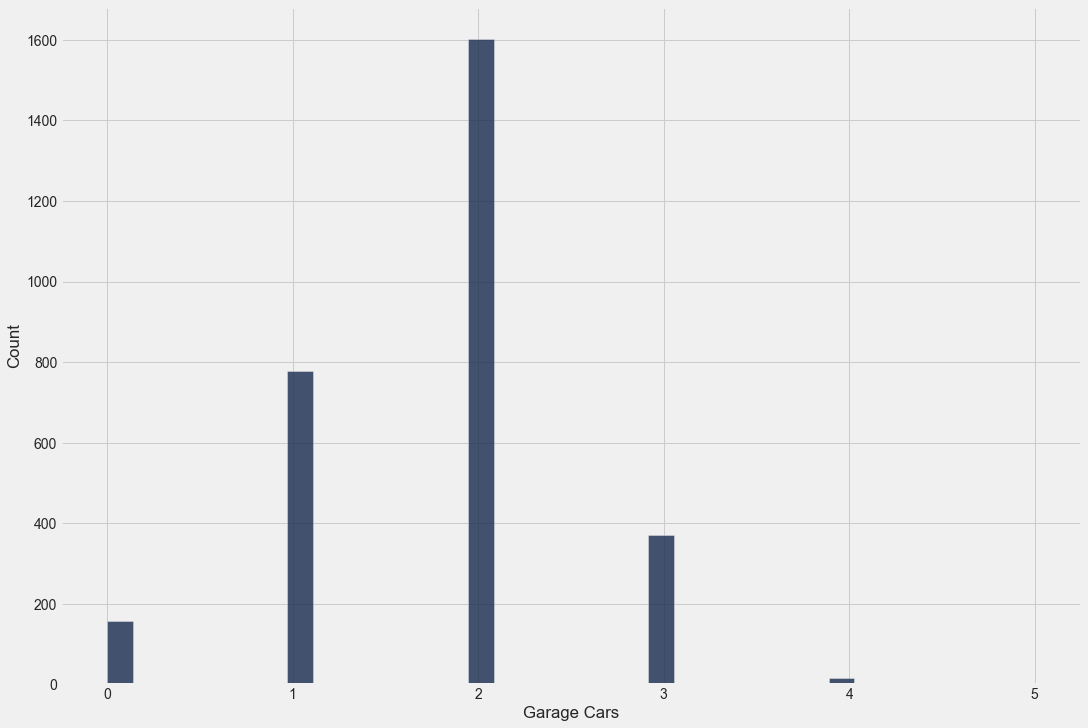

In [62]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['Garage Cars'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

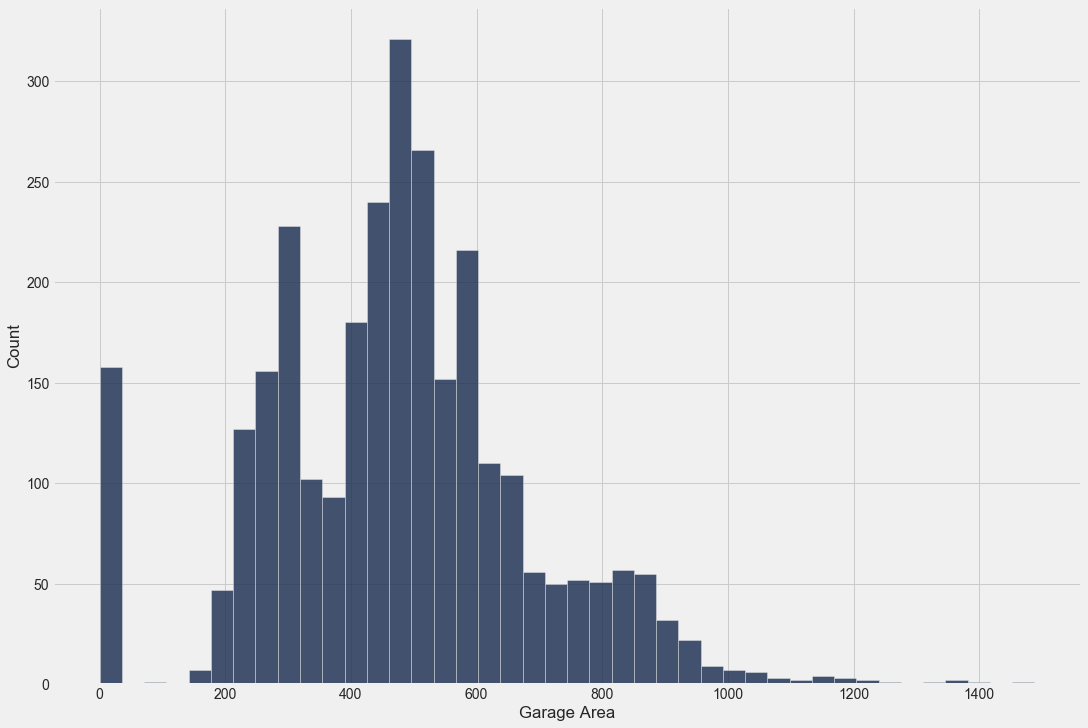

In [63]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['Garage Area'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

And now let us see their relationships with the target variable:

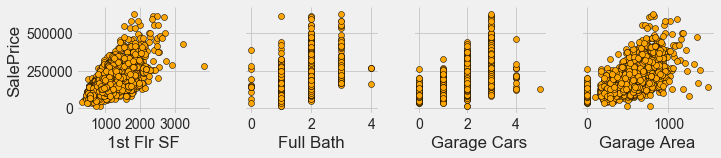

In [64]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

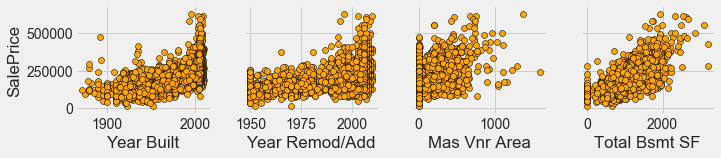

In [65]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

From the plots above, we can see that these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as Overall Qual and Gr Liv Area.

## Relatioships Between Predictor Variables

#### Positive Correlation

In [66]:
(dataset.corr()**2)["Garage Cars"].sort_values(ascending = False)[1:]

Garage Area                       0.80
SalePrice                         0.43
Overall Qual                      0.36
Garage Yr Blt                     0.34
Year Built                        0.29
Gr Liv Area                       0.24
Full Bath                         0.23
Total Bsmt SF                     0.20
1st Flr SF                        0.20
Year Remod/Add                    0.18
Mas Vnr Area                      0.13
TotRms AbvGrd                     0.12
Fireplaces                        0.10
BsmtFin SF 1                      0.06
Wood Deck SF                      0.06
Half Bath                         0.05
Open Porch SF                     0.04
Overall Cond                      0.03
Bsmt Unf SF                       0.03
2nd Flr SF                        0.03
Lot Area                          0.03
Bsmt Full Bath                    0.03
Lot Frontage                      0.02
Enclosed Porch                    0.02
Bedroom AbvGr                     0.01
Low Qual Fin SF          

In [67]:
(dataset.corr()**2)["Gr Liv Area"].sort_values(ascending = False)[1:]

TotRms AbvGrd                     0.65
SalePrice                         0.52
2nd Flr SF                        0.44
Full Bath                         0.41
Overall Qual                      0.32
Bedroom AbvGr                     0.29
1st Flr SF                        0.28
Garage Cars                       0.24
Garage Area                       0.23
Fireplaces                        0.20
Half Bath                         0.19
Total Bsmt SF                     0.16
Mas Vnr Area                      0.14
Open Porch SF                     0.10
Year Remod/Add                    0.10
Lot Area                          0.07
Wood Deck SF                      0.06
Bsmt Unf SF                       0.06
Year Built                        0.06
Lot Frontage                      0.02
BsmtFin SF 1                      0.02
Garage Yr Blt                     0.02
Kitchen AbvGr                     0.02
Overall Cond                      0.01
Low Qual Fin SF                   0.01
Screen Porch             

Apart from the target variable, when we plotted the heatmap, we discovered a high positive correlation between Garage Cars and Garage Area and between Gr Liv Area and TotRms AbvGrd. We want to visualize these correlations also. We've already seen the distribution of each of them except for TotRms AbvGrd. Let us see the distribution of TotRms AbvGrd first:

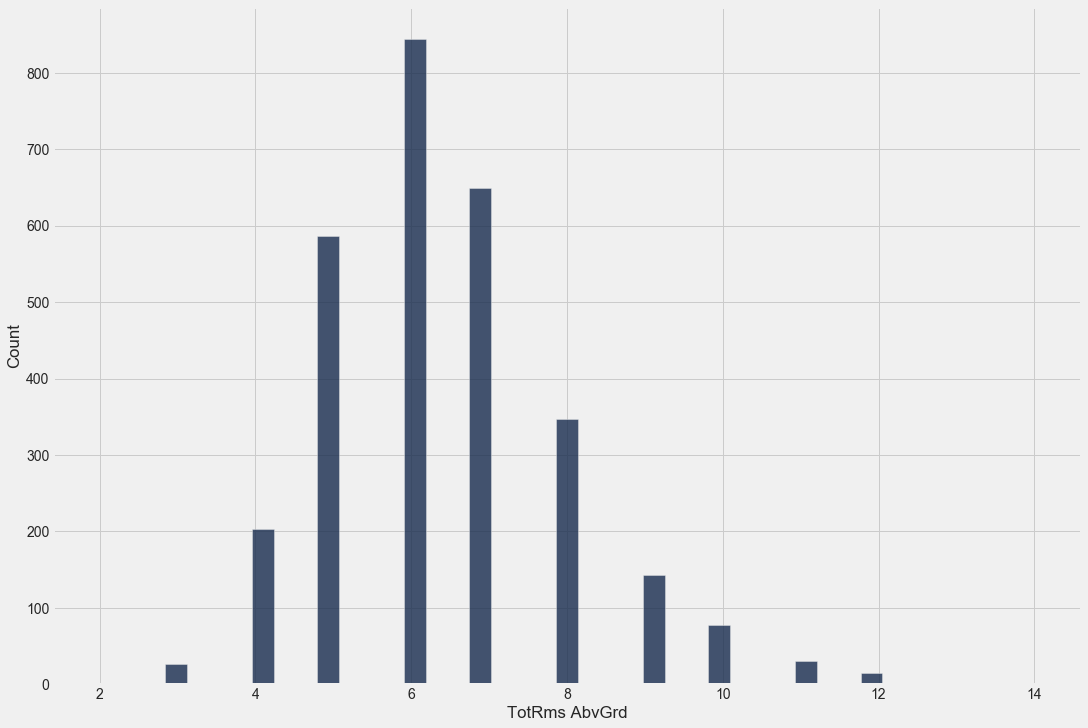

In [68]:
plt.figure(constrained_layout=True, figsize=(15,10))
sns.distplot(dataset['TotRms AbvGrd'], kde=False, color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Now, we visualize the relationship between Garage Cars and Garage Area and between Gr Liv Area and TotRms AbvGrd:

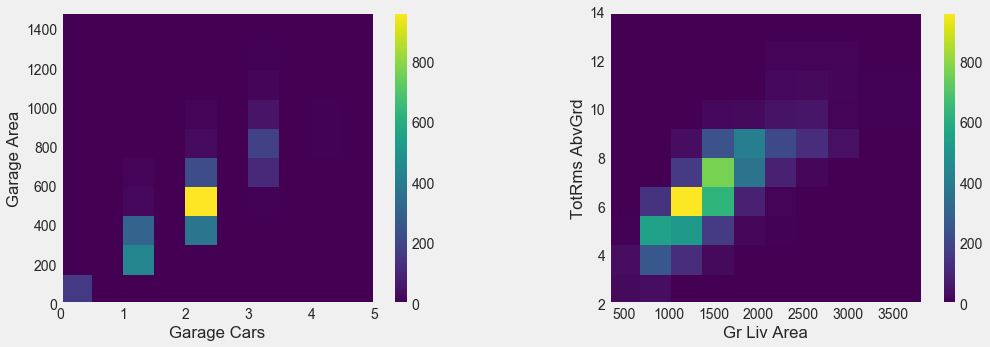

In [69]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"], 
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

We can see the strong correlation between each pair. For Garage Cars and Garage Area, we see that the highest concentration of data is when Garage Cars is 2 and Garage Area is approximately between 450 and 600 ft2. For Gr Liv Area and TotRms AbvGrd, we notice that the highest concentration is when Garage Liv Area is roughly between 800 and 2000 ft2 and TotRms AbvGrd is 6.

#### Negative Correlation

In [70]:
(dataset.corr())["Bsmt Unf SF"].sort_values(ascending = True)

BsmtFin SF 1                     -0.50
Bsmt Full Bath                   -0.40
BsmtFin SF 2                     -0.24
Overall Cond                     -0.14
MS SubClass                      -0.13
Bsmt Half Bath                   -0.11
Screen Porch                     -0.05
Wood Deck SF                     -0.04
Yr Sold                          -0.04
Half Bath                        -0.03
Pool Area                        -0.03
Misc Val                         -0.03
3Ssn Porch                       -0.01
Fireplaces                        0.00
2nd Flr SF                        0.00
Enclosed Porch                    0.01
Garage Yr Blt                     0.01
Mo Sold                           0.02
Lot Area                          0.02
Low Qual Fin SF                   0.05
Kitchen AbvGr                     0.07
Mas Vnr Area                      0.09
Open Porch SF                     0.12
Year Built                        0.13
Lot Frontage                      0.14
Garage Area              

When we plotted the heatmap, we also discovered a significant negative correlation between Bsmt Unf SF and BsmtFin SF 1, and between Bsmt Unf SF and Bsmt Full Bath. We also want to visualize these correlations. Let us see the distribution of these variables first:

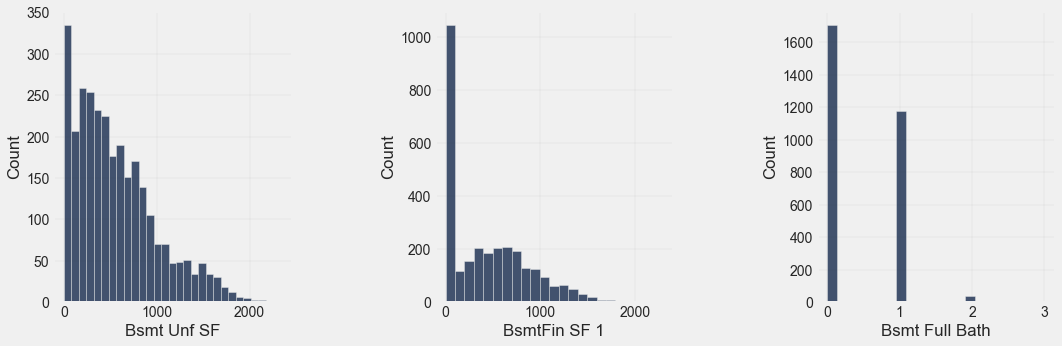

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

Now, we visualize the relationship between each pair using scatter plots:

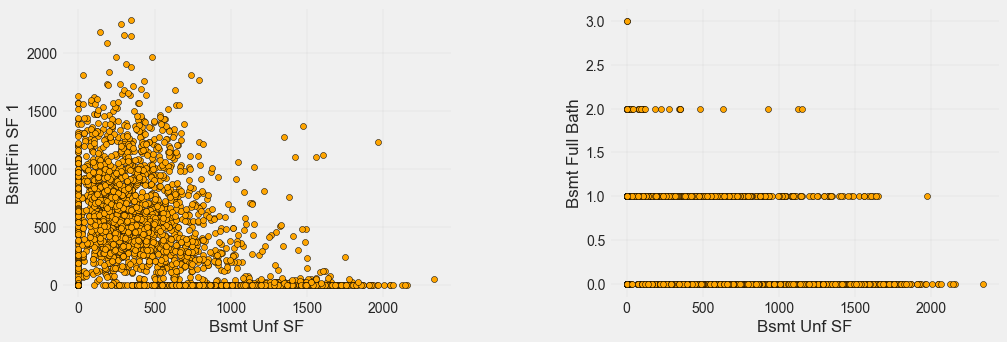

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

From the plots, we can see the negative correlation between each pair of these variables.

We will use the information we got from exploratory data analysis in this section, we will use it in feature engineering in the next section.

### Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

#### Creating New Derived Features

Firstly, we noticed a high positive correlation between the target variable SalePrice and each of Overall Qual and Gr Liv Area. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create __polynomial features__ out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

In [73]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3

In [74]:
dataset["OverallQual_GrLivArea"] = dataset["Overall Qual"] * dataset["Gr Liv Area"]

Also, we noticed that there are some predictor features that are highly correlated with each other. To avoid the Multicollinearity problem, we will delete one feature from each pair of highly correlated predictors. 

We have two pairs: the first consists of __Garage Cars and Garage Area__, and the other consists of __Gr Liv Area and TotRms AbvGrd__. 

For the first pair, we will remove Garage Cars feature; from the second pair, we will remove TotRms AbvGrd feature:

Garage Cars and Garage Area: 0.80

Gr Liv Area and TotRms AbvGrd: 0.65

In [75]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

#### Dealing with Ordinal Variables

There are some ordinal features in our dataset. 
For example, the Bsmt Cond feature has the following possible values:

In [76]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. So to solve this issue, we will map each one of the possible values of this feature to a number. 

We will map "No Basement" to 0, "Po" to 1, "Fa" to 2, "TA" to 3, "Gd" to 4, and "Ex" to 5.


The ordinal features in the dataset are: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence. We will map the values of each of them to corresponding numbers as described for Bsmt Cond above and in accordance with the dataset documentation:

In [77]:
#Instead of this, we can use Label encoding as well
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}

In [78]:
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

In [79]:
mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}

In [80]:
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

In [81]:
mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

In [82]:
dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})

In [83]:
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})

In [84]:
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

### One-Hot Encoding For Categorical Features

Machine learning models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in order for our dataset to be suitable for modeling. We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable; each of the resulting binary variables has only 0 and 1 as its possible values. Pandas package provides a convenient function get_dummies() that can be used for performing one-hot encoding on our dataset.

To see what will happen to our dataset, let us take for example the variable Paved Drive which indicates how the driveway is paved. It has three possible values: Y which means for "Paved", P which means "Partial Pavement", and N which means "Dirt/Gravel". Let us take a look at Paved Drive value for the first few rows in our dataset:

In [85]:
dataset[['Paved Drive']].head()

,Paved Drive
0,P
1,Y
2,Y
3,Y
4,Y


Now, we perform one-hot encoding:

In [86]:
dataset = pd.get_dummies(dataset)

Let us see what has happened to the Paved Drive variable by looking at the same rows above:

In [87]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


Now, after we have cleaned and prepared our dataset, it is ready for modeling.

# Prediction Type and Modeling Techniques

In this section, we choose the type of machine learning prediction that is suitable to our problem. We want to determine if this is a ragression problem or a classification problem. In this project, we want to predict the price of a house given information about it. The price we want to predict is a continuous value; it can be any real number. This can be seen by looking at the target vatiable in our dataset SalePrice:

In [88]:
dataset[['SalePrice']].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


That means that the prediction type that is appropriate to our problem is __regression__.

Now we move to choose the modeling techniques we want to use. There are a lot of techniques available for regression problems like Linear Regression, Ridge Regression, Artificial Neural Networks, Decision Trees, Random Forest, etc. In this project, we will test many modeling techniques, and then choose the technique(s) that yield the best results. The techniques that we will try are:

#### 1. Linear Regression

This technique models the relationship between the target variable and the independent variables (predictors). It fits a linear model with coefficients to the data in order to minimize the residual sum of squares between the target variable in the dataset, and the predicted values by the linear approximation.

#### 2. Nearest Neighbors

Nearest Neighbors is a type of instance-based learning. For this technique, the model tries to find a number (k) of training examples closest in distance to a new point, and predict the output for this new point from these closest neighbors. k can be a user-defined number (k-nearest neighbors), or vary based on the local density of points (radius-based neighbors). The distance metric used to measure the closeness is mostly the Euclidean distance.

#### 3. Support Vector Regression

Support vector machines (SVM) are a set of methods that can be used for classification and regression problems. When they are used for regression, we call the technique Support Vector Regression.

#### 4. Decision Trees

For this technique, the goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
An example of a simple decision tree for predicting who survived when the Titanic sank is shown in the below

<img src="Titanic DecisionTree Sample.png" alt="Alt text that describes the graphic" title="Title text" />

#### 5. Neural Networks

Neural network is a machine learning model that tries to mimic the way of working of the biological brain. A neural network consists of multiple layers. Each layer consists of a number of nodes. The nodes of each layer are connected to the nodes of adjacent layers. Each node can be activated or not based on its inputs and its activation function. An example of a neural network is shown in Figure

<img src="NeuralNet_Sample.png" alt="Alt text that describes the graphic" title="Title text" />

#### 6. Random Forest

Bagging is an ensemble method where many base models are used with a randomized subset of data to reduce the variance of a the base model.

#### 7. Gradient Boosting

Boosting is also an ensemble method where weak base models are used to create a strong model that reduces bias and variance of the base model.

Each one of these techniques has many algorithmic implementation. We will choose algorithm(s) for each of these techniques in the next section.

### Model Building and Evaluation

In this part, we will build our prediction model: we will choose algorithms for each of the techniques we mentioned in the previous section. After we build the model, we will evaluate its performance and results.

#### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(dataset.loc[:, dataset.columns != 'SalePrice'])

#### Splitting the Dataset

As usual for supervised machine learning problems, we need a training dataset to train our model and a test dataset to evaluate the model. So we will split our dataset randomly into two parts, one for training and the other for testing. For that, we will use another function from Scikit-Learn called train_test_split():

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), 
    dataset[['SalePrice']], 
    test_size=0.25, 
    random_state=3)

We specified the size of the test set to be 25% of the whole dataset. This leaves 75% for the training dataset. Now we have four subsets: X_train, X_test, y_train, and y_test. Later we will use X_train and y_train to train our model, and X_test and y_test to test and evaluate the model. X_train and X_test represent features (predictors); y_train and y_test represent the target. From now on, we will refer to X_train and y_train as the training dataset, and to X_test and y_test as the test dataset. 

### Modeling Approach

For each one of the techniques mentioned in the previous section (Linear Regression, Nearest Neighbor, Support Vector Machines, etc.), we will follow these steps to build a model:

- Choose an algorithm that implements the corresponding technique
- Search for an effective parameter combination for the chosen algorithm
- Create a model using the found parameters
- Train (fit) the model on the training dataset
- Test the model on the test dataset and get the results

#### Searching for Effective Parameters

Using Scikit-Learn, we can build a decision-tree model for example as follows:

    model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)

We can do this but to probably achieve a better performance if we choose better values for the parameters max_depth, min_samples_split, and max_features. To do so, we will examine many parameter combinations and choose the combination that gives the best score. Scikit-Learn provides a useful function for that purpose: GridSearchCV(). So for the example above, we will do the following:

<font color=grey>
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
</font>

The code above will test the decision-tree model using all the parameter combinations. It will use cross validation with 4 folds and it will use the mean absolute error for scoring and comparing different parameter combinations. At the end, it will provide us with the best parameter combination that achieved the best score so we can use it to build our model.

Sometimes, when the number of parameter combinations is large, GridSearchCV() can take very long time to run. So in addition to GridSearchCV(), we will sometimes use RandomizedSearchCV() which is similar to GridSearchCV() but instead of using all parameter combinations, it picks a number of random combinations specified by n_iter. For the example above, we can use RandomizedSearchCV() as follows:



<font color=grey>
clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                         scoring="neg_mean_absolute_error", n_iter=100)

</font>

This will make RandomizedSearchCV() pick 100 parameter combinations randomly.

#### Performance Metric

For evaluating the performance of our models, we will use mean absolute error (MAE). If  y^i  is the predicted value of the  i -th element, and  y  is the corresponding true value, then for all  n  elements, RMSE is calculated as:

\begin{equation*}
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|.
\end{equation*}

### Modeling

#### Linear Regression

For Linear Regression, we will choose three algorithmic implementations: Ridge Regression and Elastic Net. We will use the implementations provided in the Scikit-Learn package of these algorithms.

#### 1. Ridge Regression
This model has the following syntax:

Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver=’auto’, random_state=None)

Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter alpha represents the regularization strength, fit_intercept determines whether to calculate the intercept for this model, and solver controls which solver to use in the computational routines.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    #"normalize": [True, False],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    #'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True, 'solver': 'cholesky'}


We defined the parameter space above using reasonable values for chosen parameters. Then we used GridSearchCV() with 3 folds (cv=3). Now we build our Ridge model with the best parameters found:

In [93]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

Then we train our model using our training set (X_train and y_train):

In [94]:
ridge_model.fit(X_train, y_train);

Finally, we test our model on X_test. Then we evaluate the model performance by comparing its predictions with the actual true values in y_test using the MAE metric as we described above:



In [95]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 15265.20994201677


#### 2. Elastic Net

This model has the following syntax:
    
    ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection=’cyclic’)

Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter alpha is a constant that multiplies the penalty terms, l1_ratio determines the amount of L1 and L2 regularizations, fit_intercept is the same as Ridge's.

In [97]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [280,300,400, 500],
    "l1_ratio": [0.7, 0.8, 0.9, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


In [98]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

In [99]:
elasticNet_model.fit(X_train, y_train);

In [100]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 14762.610280746498


#### Nearest Neighbors

For Nearest Neighbors, we will use an implementation of the k-nearest neighbors (KNN) algorithm provided by Scikit-Learn package.

The KNN model has the following syntax:

KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
                    leaf_size=30, p=2, metric=’minkowski’, metric_params=None, 
                    n_jobs=None, **kwargs)


Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter n_neighbors represents k which is the number of neighbors to use, weights determines the weight function used in prediction: uniform or distance, algorithm specifies the algorithm used to compute the nearest neighbors, leaf_size is passed to BallTree or KDTree algorithm. It can affect the speed of the construction and query, as well as the memory required to store the tree.

In [102]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 11, 'weights': 'distance'}


In [103]:
knn_model = KNeighborsRegressor(**clf.best_params_)

In [104]:
knn_model.fit(X_train, y_train);

In [105]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 22740.32846125881


#### Support Vector Regression

For Support Vector Regression (SVR), we will use one of three implementations provided by the Scikit-Learn package.

The SVR model has the following syntax:

SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, 
    C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    
Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter kernel specifies the kernel type to be used in the algorithm, degree represents the degree of the polynomial kernel poly, gamma is the kernel coefficient for rbf, poly and sigmoid kernels, coef0 is independent term in kernel function, and C is the penalty parameter of the error term.

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": ["poly", "linear", "rbf", "sigmoid"],
        "degree": [3, 5],
        "coef0": [0, 3, 7],
        "gamma":[1e-3, 1e-1, 1/X_train.shape[1]],
        "C": [1, 10, 100],
    }

clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters:
{'C': 100, 'coef0': 3, 'degree': 5, 'gamma': 0.004132231404958678, 'kernel': 'poly'}


In [107]:
svr_model = SVR(**clf.best_params_)
svr_model.fit(X_train, y_train);

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Regression MAE =", svr_mae)

Support Vector Regression MAE = 12871.608868774609


#### Decision Tree

For Decision Tree (DT), we will use an implementations provided by the Scikit-Learn package.

The Decision Tree model has the following syntax:

DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)
                      
Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter criterion specifies the function used to measure the quality of a split, min_samples_split determines the minimum number of samples required to split an internal node, min_samples_leaf determines the minimum number of samples required to be at a leaf node, and max_features controls the number of features to consider when looking for the best split.

In [109]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mse', 'max_features': 242, 'min_samples_leaf': 7, 'min_samples_split': 18}


In [110]:
dt_model = DecisionTreeRegressor(**clf.best_params_)
dt_model.fit(X_train, y_train);

y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 20873.949425979506


#### Neural Network

For Neural Network (NN), we will use an implementations provided by the Scikit-Learn package.

The Neural Network model has the following syntax:

MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, 
             alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, 
             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, 
             momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
             n_iter_no_change=10)
             
             
Firstly, we will use GridSearchCV() to search for the best model parameters in a parameter space provided by us. The parameter hidden_layer_sizes is a list where its ith element represents the number of neurons in the ith hidden layer, activation specifies the activation function for the hidden layer, solver determines the solver for weight optimization, and alpha represents L2 regularization penalty.

In [111]:
from sklearn.neural_network import MLPRegressor

parameter_space = \
    {
        "hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs"],
        "alpha": [1, 10, 100],
    }

clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters:
{'activation': 'identity', 'alpha': 10, 'hidden_layer_sizes': (154,), 'solver': 'lbfgs'}


C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [112]:
nn_model = MLPRegressor(**clf.best_params_)
nn_model.fit(X_train, y_train);

y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", nn_mae)

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network MAE = 15596.083127838067


C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


In [114]:
rf_model = RandomForestRegressor(**clf.best_params_)
rf_model.fit(X_train, y_train);

y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

C:\Users\prabhu\Anaconda3\envs\MLModels\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest MAE = 14453.878861566483


#### Gradient Boosting

In [115]:
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

[02:10:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [116]:
xgb_model = XGBRegressor(**clf.best_params_)
xgb_model.fit(X_train, y_train);

y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

[02:12:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost MAE = 12571.660257641735


# Analysis and Comparison

In the previous section, we created many models: for each model, we searched for good parameters then we constructed the model using those parameters, then trained (fitted) the model to our training data (X_train and y_train), then tested the model on our test data (X_test) and finally, we evaluated the model performance by comparing the model predictions with the true values in y_test. We used the mean absolute error (MAE) to evaluate model performance.

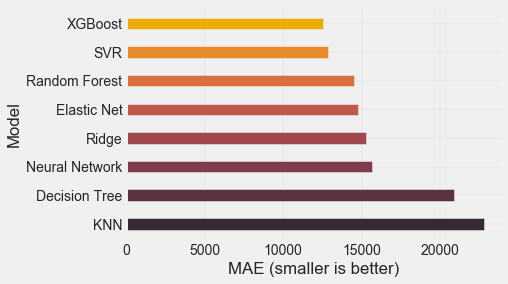

In [117]:
x = ['KNN', 'Decision Tree', 'Neural Network', 'Ridge', 
     'Elastic Net', 'Random Forest', 'SVR', 'XGBoost']
y = [22780.14, 20873.95, 15656.38, 15270.46, 14767.91,
     14506.46, 12874.93, 12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that XGBoost model has the smallest MAE, 12556.68 followed by Support Vector Regression model with a little larger error of 12974.93. After that, Random Forest and Elastic Net models come with similar errors: 14506.46 and 14767.91 respectively. Then come Ridge and Neural Network models with close errors: 15270.46 and 15656.38 respectively. Then comes Decision Tree model with MAE of 20873.95, and at last, the K-Nearest Neighbors model with an error of 22780.14.

So, in our experiment, the best model is XGBoost and the worst model is K-Nearest Neighbors. We can see that the difference in MAE between the best model and the worst model is significant; the best model has almost half of the error of the worst model.

#### Performance Interpretation

We chose the mean absolute error (MAE) as our performance metric to evaluate and compare models. MAE presents a value that is easy to understand; it shows the average value of model error. For example, for our XGBoost model, its MAE is 12556.68 which means that on average, XGBoost will predict a value that is bigger or smaller than the true value by 12556.68. Now to understand how good this MAE is, we need to know the range and distribution of the data. In our case, we need to see the values of the target variable SalePrice which contains the actual house prices. Let's see the violin plot, box plot, and histogram of SalePrice in our dataset:

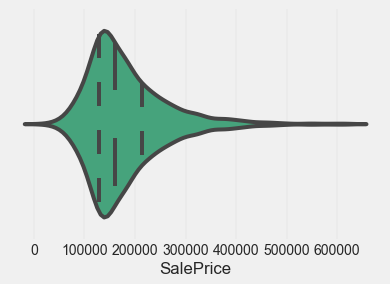

In [118]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

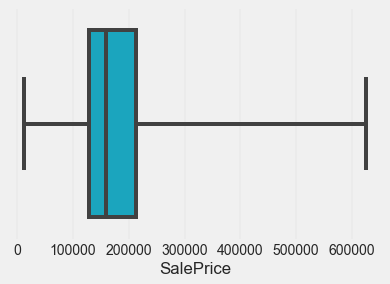

In [119]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

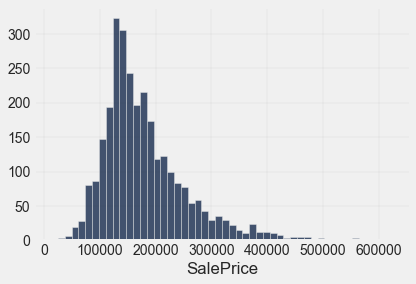

In [120]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

In [121]:
y_train.describe(include=[np.number])

,SalePrice
count,2193.00
mean,179846.69
std,79729.38
min,12789.00
25%,128500.00
50%,159895.00
75%,214000.00
max,625000.00


#### Feature Importances

Some of the models we used provide the ability to see the importance of each feature in the dataset after fitting the model. We will look at the feature importances provided by both XGBoost and Random Forest models. We have 242 features in our data which is a big number, so we will take a look at the 15 most important features.

#### XGBoost

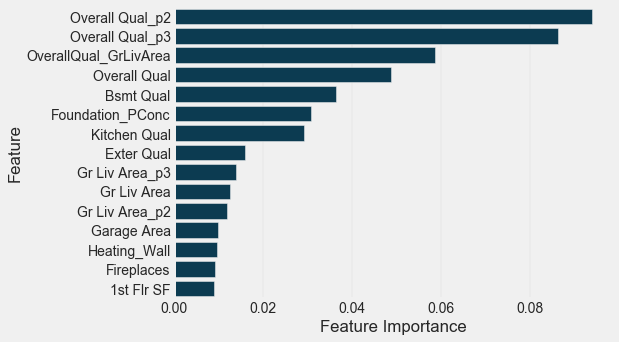

In [122]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

#### Random Forest
Now, let's see the most important features as for Random Forest model:

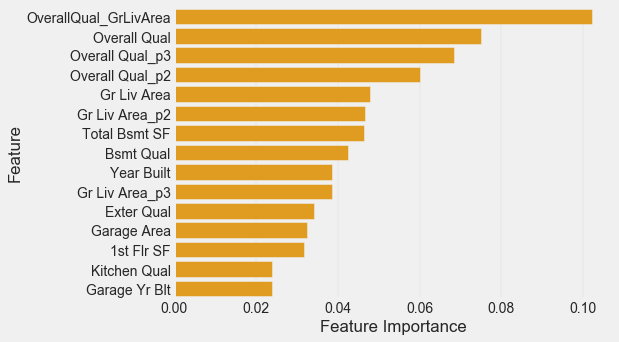

In [123]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

#### Common Important Features
Now, let us see which features are among the most important features for both XGBoost and Random Forest models, and let's find out the difference in their importance regarding the two models:

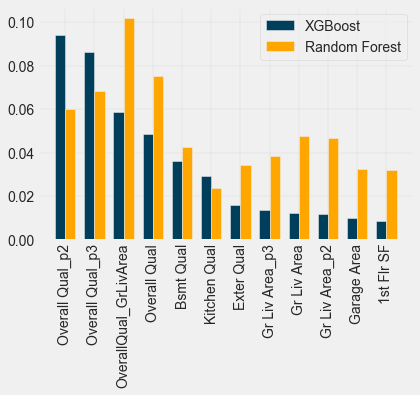

In [124]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);